## 500city_clean - Exploring the data from 500 cities data set and checking for data cleanliness. We will fill missing data and check for outliers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import cleansed data sets

In [3]:
data = pd.read_csv('../data/raw/data.csv',index_col=0)
locations = pd.read_csv('../data/raw/locations.csv',index_col=0)

In [4]:
locations.cityname = locations.cityname.fillna('United States') ##INSTEAD OF NAN, fill CITY OF UNITED STATES FOR AGG FUNCTIONS

In [18]:
dataTemp = data.set_index('uniqueid').join(locations.set_index('uniqueid'))
dataTemp['geographiclevel'].value_counts()
#dataTemp[dataTemp['datavaluetypeid']=='AgeAdjPrv']

Census Tract    27198
City             1000
US                  2
Name: geographiclevel, dtype: int64

# Check for missing data

In [20]:
#data = data.join(locations[['cityname','geographiclevel','uniqueid']].set_index('uniqueid'),on='uniqueid',how='left',)
data.describe().sort_values('count',axis=1)

,COREW,COREM,TEETHLOST,MAMMOUSE,COLON_SCREEN,PAPTEST,ACCESS2,BINGE,SLEEP,PHLTH,...,COPD,CHOLSCREEN,CHECKUP,CHD,CASTHMA,CANCER,BPMED,BPHIGH,DENTAL,populationcount
count,28091.000000,28097.000000,28140.000000,28163.000000,28181.000000,28193.000000,28199.000000,28200.000000,28200.000000,28200.000000,...,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,2.820000e+04
mean,0.287004,0.299446,0.162323,0.749657,0.593809,0.789161,0.174237,0.167900,0.370524,0.129222,...,0.061554,0.726560,0.683670,0.056381,0.094804,0.055842,0.719670,0.304917,0.598970,3.285559e+04
std,0.072547,0.064604,0.084670,0.050455,0.092823,0.063533,0.098298,0.038247,0.063665,0.043165,...,0.024407,0.083061,0.061276,0.020961,0.017219,0.017869,0.078521,0.082096,0.130059,2.601662e+06
min,0.096000,0.131000,0.029000,0.414000,0.234000,0.376000,0.024000,0.024000,0.185000,0.031000,...,0.009000,0.217000,0.454000,0.002000,0.053000,0.007000,0.115000,0.049000,0.189000,5.100000e+01
25%,0.231000,0.250000,0.096000,0.718000,0.529000,0.751000,0.099000,0.144000,0.325000,0.096000,...,0.044000,0.678000,0.639750,0.043000,0.082000,0.044000,0.680000,0.254000,0.502000,2.500000e+03
50%,0.287000,0.299000,0.144000,0.756000,0.607000,0.799000,0.151000,0.165000,0.363000,0.122000,...,0.057000,0.734000,0.681000,0.054000,0.091000,0.054000,0.730000,0.293000,0.614000,3.694500e+03
75%,0.339000,0.346000,0.212000,0.788000,0.666000,0.838000,0.227000,0.189000,0.411000,0.157000,...,0.074000,0.785000,0.727000,0.067000,0.104000,0.065000,0.772000,0.344000,0.704000,5.080000e+03
max,0.538000,0.522000,0.550000,0.889000,0.815000,0.915000,0.641000,0.432000,0.598000,0.377000,...,0.250000,0.955000,0.894000,0.346000,0.193000,0.231000,0.932000,0.710000,0.871000,3.087455e+08


#### There only seems to be 7 columns with missing data out of 29. The most missing information is 109 rows or .3% of information. 

#### Next I'll check to see where the missing data is coming from

In [21]:
# pull dataframe of missing data, join city and geography type, and get a count by geography type.
missingData = data[data.isnull().values].join(locations[['uniqueid','cityname','geographiclevel']].set_index('uniqueid'),on='uniqueid',how='left')

#value counts of missing data by geographic level
print(missingData['geographiclevel'].value_counts(),end='\n\n')

#value counts of all data by geographic level
print(data.join(locations[['uniqueid','cityname','geographiclevel']].set_index('uniqueid'),on='uniqueid',how='left')['geographiclevel'].value_counts())

Census Tract    336
Name: geographiclevel, dtype: int64

Census Tract    27198
City             1000
US                  2
Name: geographiclevel, dtype: int64


#### As we can see there are only 336 census tracts of missing data out of 27198 (1%). No rolled up cities are missing data as well as the rolled up united states.
#### Now I'll build a dataframe that includes only missing data grouped by city, showing the mean population of the census tracts with missing data, the count of census tracts in each city missing data, the count of total census tracts from those cities, and the % of census tracts that are missing from each city

In [22]:
missingDataPopMean = missingData.groupby('cityname')['populationcount'].mean()
missingDataCensusCount = missingData.groupby('cityname')['uniqueid'].count()
missingDataJoined = pd.concat([missingDataPopMean,missingDataCensusCount],axis=1,keys=['AvgPop','MissingCensusCount'])
fullDataCensusCount = data.join(locations[['uniqueid','cityname','geographiclevel']].set_index('uniqueid'),on='uniqueid',how='left').groupby('cityname')['uniqueid'].count()
missingDataCities = missingDataJoined.join(fullDataCensusCount,how='left')
missingDataCities.columns = ['Avg Population','Num Census Tracts Missing','CensusTract Count']
missingDataCities['perMissing'] = missingDataCities.iloc[:,1]/missingDataCities.iloc[:,2]
missingDataCities.sort_values('perMissing',ascending=False,inplace=True)
print('TOP AND BOTTOM 5 Cities Missing Percentage Of Censuses')
pd.concat([missingDataCities.head(10)])

TOP AND BOTTOM 5 Cities Missing Percentage Of Censuses


,Avg Population,Num Census Tracts Missing,CensusTract Count,perMissing
cityname,,,,
Santa Maria,147.000000,6,20,0.300000
Fayetteville,1709.733333,15,69,0.217391
Rock Hill,1762.000000,5,24,0.208333
Gulfport,85.000000,5,24,0.208333
Missouri City,56.750000,4,20,0.200000
Abilene,1700.428571,7,39,0.179487
Boca Raton,2224.000000,5,29,0.172414
Miami Beach,59.000000,5,31,0.161290
Portsmouth,78.000000,5,33,0.151515


### Should we drop any census tracts from the data? IE is the  census missing most of it's data across all variables?

In [23]:
# How many data points are any of these census's missing?
sm = data.drop('datavaluetypeid',axis=1).set_index('uniqueid').apply(lambda x: np.where(np.isnan(x),1,0),axis=1).sum(axis=1)
sm.name ='numMissing'
ct = data.drop('datavaluetypeid',axis=1).set_index('uniqueid').apply(lambda x: np.where(np.isnan(x),1,0),axis=1).count(axis=1)
div = sm.divide(ct)
div.name = '% Missing'
locations.set_index('uniqueid').loc[sm.divide(ct).sort_values(ascending=False).head(25).index,:].join(sm).sort_values('numMissing',ascending=False).join(div)

,stateabbr,cityname,geographiclevel,tractfips,cityfips,statedesc,latitude,longitude,numMissing,% Missing
uniqueid,,,,,,,,,,
0150000-01097003605,AL,Mobile,Census Tract,1.097004e+09,150000.0,Alabama,-88.182347,30.695163,5,0.172414
0658072-06037402404,CA,Pomona,Census Tract,6.037402e+09,658072.0,California,-117.809722,34.059742,5,0.172414
0669196-06083002013,CA,Santa Maria,Census Tract,6.083002e+09,669196.0,California,-120.449959,34.881549,6,0.206897
1207300-12099007100,FL,Boca Raton,Census Tract,1.209901e+10,1207300.0,Florida,-80.105045,26.375602,5,0.172414
1245025-12086981000,FL,Miami Beach,Census Tract,1.208698e+10,1245025.0,Florida,-80.149586,25.772408,5,0.172414
1270600-12073001300,FL,Tallahassee,Census Tract,1.207300e+10,1270600.0,Florida,-84.300310,30.442787,4,0.137931
1271000-12057010809,FL,Tampa,Census Tract,1.205701e+10,1271000.0,Florida,-82.400457,28.055130,5,0.172414
1271000-12057010900,FL,Tampa,Census Tract,1.205701e+10,1271000.0,Florida,-82.407489,28.066207,4,0.137931
15003007303,HI,Honolulu,Census Tract,1.500301e+10,15003.0,Hawaii,-157.945147,21.325821,5,0.172414


#### It looks like the most amount of variables any one census is missing is 21%. I'll keep all census tracts in.

## Clean Data by filling census tract NANs with data from mean values of the same city 

In [24]:
cleanedData = data.join(locations[['uniqueid','cityname','stateabbr','geographiclevel']].set_index('uniqueid'),on='uniqueid',how='left').copy()
colsToClean = cleanedData.drop(['uniqueid','cityname','stateabbr','datavaluetypeid','populationcount','geographiclevel'],axis=1).columns
for col in colsToClean:
    cleanedData[col] = cleanedData.groupby('cityname')[col].transform(lambda x: x.fillna(np.mean(x)))

In [25]:
# Check cleaned Data For Missing Values. 
cleanedData.describe().sort_values('count',axis=1)

,populationcount,SLEEP,PHLTH,PAPTEST,OBESITY,MHLTH,MAMMOUSE,LPA,KIDNEY,HIGHCHOL,...,CHD,CASTHMA,CANCER,BPMED,BPHIGH,BINGE,ARTHRITIS,ACCESS2,COREM,TEETHLOST
count,2.820000e+04,28200.000000,28200.000000,28200.000000,28200.00000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,...,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000
mean,3.285559e+04,0.370524,0.129222,0.789159,0.29682,0.128907,0.749651,0.269820,0.027387,0.345302,...,0.056381,0.094804,0.055842,0.719670,0.304917,0.167900,0.218336,0.174235,0.299481,0.162325
std,2.601662e+06,0.063665,0.043165,0.063526,0.07905,0.034362,0.050438,0.084505,0.008134,0.051445,...,0.020961,0.017219,0.017869,0.078521,0.082096,0.038247,0.060926,0.098297,0.064543,0.084604
min,5.100000e+01,0.185000,0.031000,0.376000,0.08700,0.041000,0.414000,0.085000,0.005000,0.074000,...,0.002000,0.053000,0.007000,0.115000,0.049000,0.024000,0.021000,0.024000,0.131000,0.029000
25%,2.500000e+03,0.325000,0.096000,0.751000,0.23900,0.102000,0.718000,0.203000,0.022000,0.318000,...,0.043000,0.082000,0.044000,0.680000,0.254000,0.144000,0.177000,0.099000,0.250000,0.096000
50%,3.694500e+03,0.363000,0.122000,0.799000,0.28800,0.125000,0.756000,0.261000,0.026000,0.348000,...,0.054000,0.091000,0.054000,0.730000,0.293000,0.165000,0.214000,0.151000,0.299500,0.144000
75%,5.080000e+03,0.411000,0.157000,0.838000,0.34600,0.152000,0.788000,0.331000,0.031000,0.378000,...,0.067000,0.104000,0.065000,0.772000,0.344000,0.189000,0.256000,0.227000,0.346000,0.212000
max,3.087455e+08,0.598000,0.377000,0.915000,0.55900,0.298000,0.889000,0.596000,0.105000,0.577000,...,0.346000,0.193000,0.231000,0.932000,0.710000,0.432000,0.574000,0.641000,0.522000,0.550000


### Are there any outliers in the data that need to be cleaned?

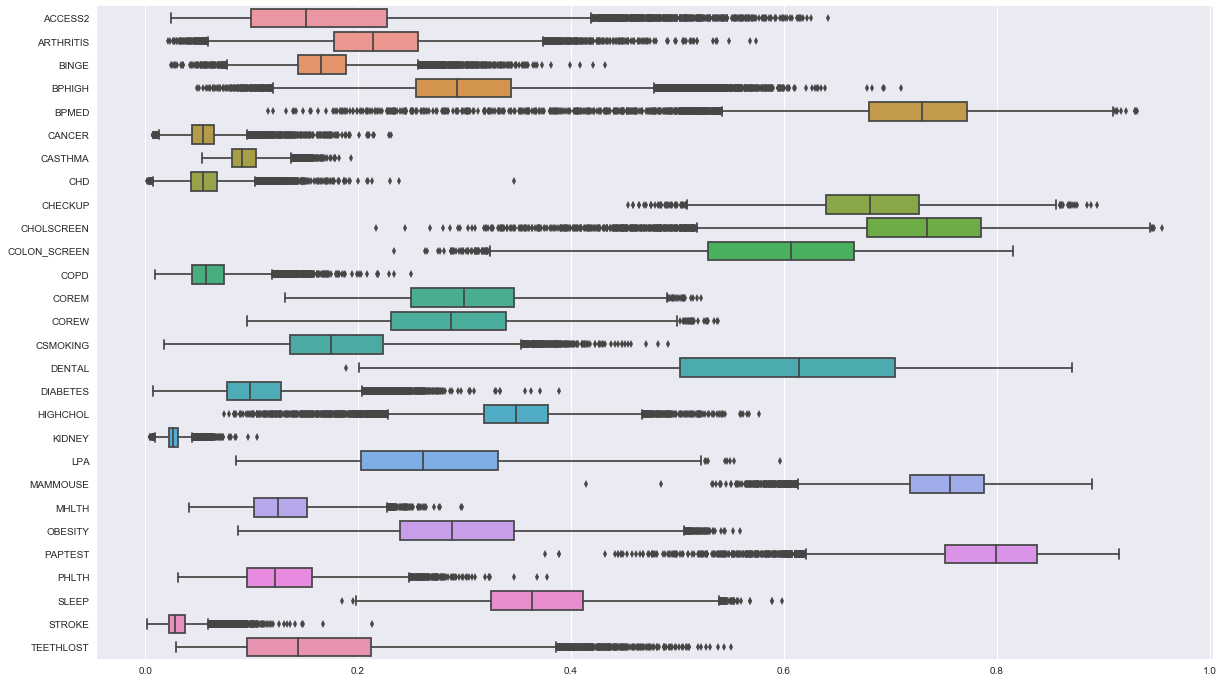

In [26]:
fig, ax = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(data=cleanedData.drop(['populationcount'],axis=1),ax=ax,orient='horizontal')
plt.show()

When looking at a box and whisker plot, there are many census tracts that fall outside of of the inter quartile ranges (outliers) but I don't believe they are erroneous data.

This could be cause by low sample size of certain census tracts or there are truly many census tracts that fall outside of the inter quartile ranges.

Now we'll look at the outliers at a city level to see if there's much of a difference

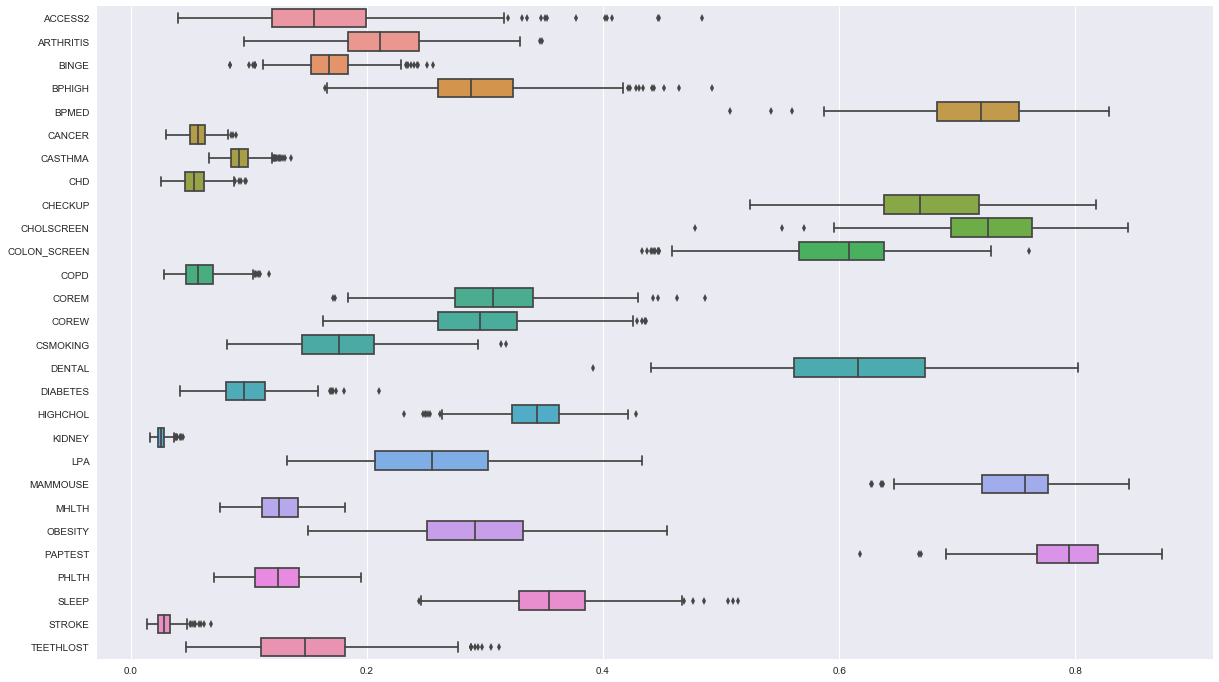

In [27]:
tst = cleanedData[cleanedData['geographiclevel']=='Census Tract'].set_index('uniqueid').drop(['cityname','stateabbr','geographiclevel','datavaluetypeid','populationcount'],axis=1)
tst1 = tst.multiply(cleanedData[cleanedData['geographiclevel']=='Census Tract'].set_index('uniqueid')['populationcount'],axis=0)
tst2 = tst1.join(cleanedData[cleanedData['geographiclevel']=='Census Tract'].set_index('uniqueid')[['stateabbr','cityname']]).groupby(['stateabbr','cityname']).agg(np.sum)
tst3 = tst2.divide(cleanedData[cleanedData['geographiclevel']=='Census Tract'].groupby(['stateabbr','cityname'])['populationcount'].sum(),axis=0)

fig, ax = plt.subplots(1,1,figsize=(20,12))
_  = sns.boxplot(data=tst3,orient='horizontal')
plt.show()


It looks like most of the data points are somewhat of a normal distribution. I think this data is clean and ready for a deeper analysis. Time to save it for future Use!

In [28]:
cleanedData.drop(['geographiclevel','stateabbr','cityname'],axis=1).to_csv('../data/cleansed/data.csv')
locations.to_csv('../data/cleansed/locations.csv')